# **Nashville Housing Dataset**

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
# importing the dataset

data = pd.read_csv("/content/week 4 - Nashville_housing_data.csv")
print("The shape of the dataset:",data.shape)

The shape of the dataset: (22651, 26)


In [3]:
# Getting a view of the raw dataset

data.head(4)

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under


In [4]:
# Count of unique values in each column

print(data.nunique())

Unnamed: 0                           22651
Parcel ID                            19720
Land Use                                 4
Property Address                     20448
Suite/ Condo   #                         0
Property City                           10
Sale Date                             1044
Legal Reference                      22452
Sold As Vacant                           2
Multiple Parcels Involved in Sale        2
City                                    10
State                                    1
Acreage                                407
Tax District                             7
Neighborhood                           189
Land Value                             886
Building Value                        4298
Finished Area                         5955
Foundation Type                          6
Year Built                             125
Exterior Wall                            9
Grade                                   10
Bedrooms                                12
Full Bath  

In [5]:
# dropping unnecessary columns like(col having all the unique values, duplicate columns etc)
data.drop(['Unnamed: 0','Parcel ID','Property Address','Suite/ Condo   #','Property City','Legal Reference','State','Neighborhood'],axis=1, inplace=True)

In [6]:
# Checking the missing values 
data.isnull().sum()

Land Use                               0
Sale Date                              0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
City                                   0
Acreage                                0
Tax District                           0
Land Value                             0
Building Value                         0
Finished Area                          1
Foundation Type                        1
Year Built                             0
Exterior Wall                          0
Grade                                  0
Bedrooms                               3
Full Bath                              1
Half Bath                            108
Sale Price Compared To Value           0
dtype: int64

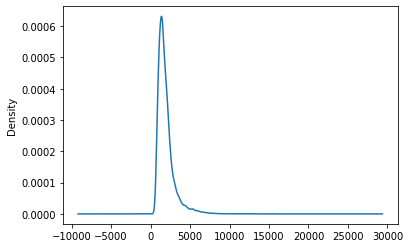

In [7]:
# Checking the distribution of "Finished Area" column
data['Finished Area'].plot(kind='kde')


In [8]:
# Replacing the missing value of "Finished Area" with mean value
mean_value=data['Finished Area'].mean()
data['Finished Area'].fillna(value=mean_value, inplace=True)

In [9]:
# Replacing the missing value of "Half Bath" with mode value
data['Half Bath'] = data['Half Bath'].fillna(data['Half Bath'].mode()[0])

In [10]:
# Removing all the other missing data from the dataset
data = data.dropna()

In [11]:
# Checking the datatype of each column
data.dtypes

Land Use                              object
Sale Date                             object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
City                                  object
Acreage                              float64
Tax District                          object
Land Value                             int64
Building Value                         int64
Finished Area                        float64
Foundation Type                       object
Year Built                             int64
Exterior Wall                         object
Grade                                 object
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Sale Price Compared To Value          object
dtype: object

In [12]:
# Changing the dataypes of each column

data['Land Use'] = data['Land Use'].astype('category')
data['Tax District'] = data['Tax District'].astype('category')
data['City'] = data['City'].astype('category')
data['Foundation Type'] = data['Foundation Type'].astype('category')
data['Exterior Wall'] = data['Exterior Wall'].astype('category')
data['Grade'] = data['Grade'].astype('category')
data['Bedrooms'] = data['Bedrooms'].astype('int')
data['Full Bath'] = data['Full Bath'].astype('int')
data['Half Bath'] = data['Half Bath'].astype('int')
# data['Sale Price Compared To Value'] = data['Sale Price Compared To Value'].astype('category')

In [13]:
#Adding additional Features
data['Sale Date'] = pd.to_datetime(data['Sale Date'])
data['Sale_Year'] = pd.DatetimeIndex(data['Sale Date']).year
data['Sale_Month'] = pd.DatetimeIndex(data['Sale Date']).month

#data['Total_Value'] = data['Land Value'] + data['Building Value']
# data.groupby(['Sale_Year'])['Sale Price'].mean().plot.bar()

data.drop(columns=['Sale Date'],axis=1, inplace=True)

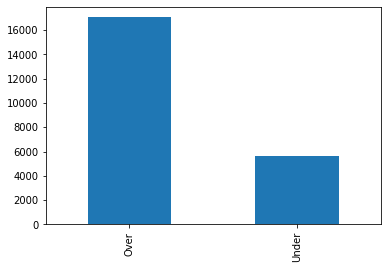

In [14]:
pd.value_counts(data['Sale Price Compared To Value']).plot.bar()

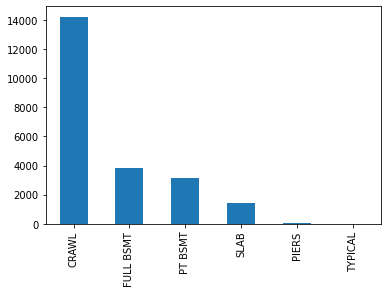

In [15]:
# Checking the popularity of house types

pd.value_counts(data['Foundation Type']).plot.bar()


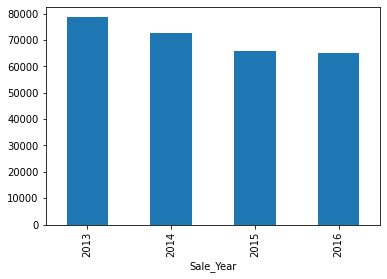

In [16]:
# Checking the sale price with respect to year

data.groupby(['Sale_Year'])['Land Value'].mean().plot.bar()

In [17]:
# Using get_dummies to encode the categorical data

data = pd.get_dummies(data, columns=['Land Use','Tax District','City','Foundation Type', 'Exterior Wall', 'Grade'], drop_first=False, dummy_na=False)
data

,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,...,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_SSC,Grade_X
0,No,No,0.17,32000,134400,1149.00000,1941,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1,No,No,0.11,34000,157800,2090.82495,2000,3,2,1,...,0,0,0,0,1,0,0,0,0,0
2,No,No,0.17,25000,243700,2145.60001,1948,4,2,0,...,0,0,0,1,0,0,0,0,0,0
3,No,No,0.34,25000,138100,1969.00000,1910,2,1,0,...,0,0,0,0,1,0,0,0,0,0
4,No,No,0.17,25000,86100,1037.00000,1945,2,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,No,No,0.38,25000,105000,1758.00000,1996,3,2,0,...,0,0,0,0,1,0,0,0,0,0
22647,No,No,0.27,25000,142400,2421.00000,1996,3,3,0,...,0,0,0,0,1,0,0,0,0,0
22648,No,No,0.23,25000,159300,3117.00000,1995,3,3,0,...,0,0,0,0,1,0,0,0,0,0
22649,No,No,0.15,40000,204100,1637.00000,2004,3,2,1,...,0,0,0,1,0,0,0,0,0,0


In [18]:
# Using Label Encoder. 
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data['Sold As Vacant']= le.fit_transform(data['Sold As Vacant'])
data['Multiple Parcels Involved in Sale']= le.fit_transform(data['Multiple Parcels Involved in Sale'])
data['Sale Price Compared To Value']= le.fit_transform(data['Sale Price Compared To Value'])

In [19]:
data

,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,...,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_SSC,Grade_X
0,0,0,0.17,32000,134400,1149.00000,1941,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0.11,34000,157800,2090.82495,2000,3,2,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0.17,25000,243700,2145.60001,1948,4,2,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0.34,25000,138100,1969.00000,1910,2,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0.17,25000,86100,1037.00000,1945,2,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,0,0,0.38,25000,105000,1758.00000,1996,3,2,0,...,0,0,0,0,1,0,0,0,0,0
22647,0,0,0.27,25000,142400,2421.00000,1996,3,3,0,...,0,0,0,0,1,0,0,0,0,0
22648,0,0,0.23,25000,159300,3117.00000,1995,3,3,0,...,0,0,0,0,1,0,0,0,0,0
22649,0,0,0.15,40000,204100,1637.00000,2004,3,2,1,...,0,0,0,1,0,0,0,0,0,0


In [20]:
print(data.shape)

(22646, 57)


# **---------------Logistic Regression----------------**

In [21]:
####### Logistic Regression #########

# Defining feature and target variables 
X = data.drop(columns=['Sale Price Compared To Value'])
y = data[['Sale Price Compared To Value']]


In [22]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 29)


In [23]:
# Getting the list of column labels
header = []
for col in X_train:
    header.append(col)

In [24]:
# Balancing the imbalanced dataset by using oversampling technique
from imblearn.over_sampling import SMOTE

sampling = SMOTE(random_state = 10) #Using SMOTE technique
X_train, y_train = sampling.fit_resample(X_train.values, y_train.values) 


# Shuffle the data
perms = np.random.permutation(X_train.shape[0]) 
X_train = X_train[perms]
y_train = y_train[perms]


# Converting it to a dataframe
X_train = pd.DataFrame(data = X_train)
y_train = pd.DataFrame(data = y_train)



print('dataset shape after SMOTE:\n',y_train.value_counts()) 

dataset shape after SMOTE:
 0    11980
1    11980
dtype: int64


In [25]:
# Setting the header after SMOTE
X_train.columns = header

In [26]:
# Getting the summary after logistic regression
import statsmodels.api as sm

logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())


         Current function value: 0.589194
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                23960
Model:                          Logit   Df Residuals:                    23910
Method:                           MLE   Df Model:                           49
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:                  0.1500
Time:                        17:17:37   Log-Likelihood:                -14117.
converged:                      False   LL-Null:                       -16608.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Sold As Vacant                             4.2732      0.491      8.700      0.000      

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [28]:
#Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [29]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3639 1427]
 [1082  646]]


In [30]:
# Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.72      0.74      5066
           1       0.31      0.37      0.34      1728

    accuracy                           0.63      6794
   macro avg       0.54      0.55      0.54      6794
weighted avg       0.65      0.63      0.64      6794



# **---------------Decision Tree----------------**


In [31]:
############# Decision Tree 


In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'gini', random_state=42,max_depth=4, min_samples_leaf=5)   
clf = clf.fit(X_train,y_train)



                                   feature  importance
10                               Sale_Year       0.944
6                               Year Built       0.050
3                               Land Value       0.003
28                            City_MADISON       0.002
5                            Finished Area       0.001
41                  Exterior Wall_CONC BLK       0.000
40               Exterior Wall_BRICK/FRAME       0.000
39                     Exterior Wall_BRICK       0.000
38                 Foundation Type_TYPICAL       0.000
37                    Foundation Type_SLAB       0.000
35                   Foundation Type_PIERS       0.000
36                 Foundation Type_PT BSMT       0.000
43               Exterior Wall_FRAME/STONE       0.000
34               Foundation Type_FULL BSMT       0.000
33                   Foundation Type_CRAWL       0.000
32                       City_WHITES CREEK       0.000
42                     Exterior Wall_FRAME       0.000
45        

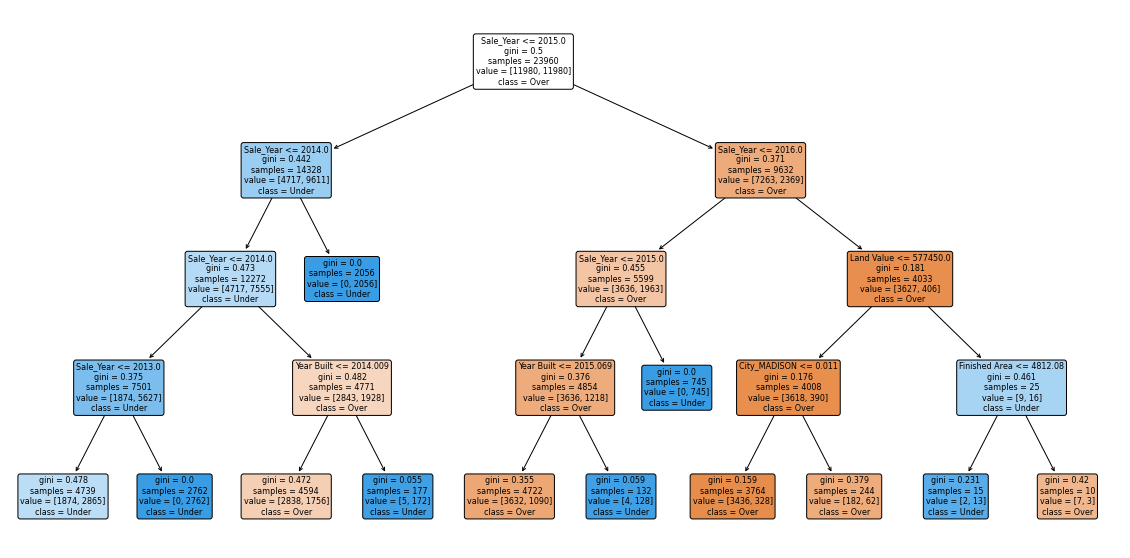

In [33]:
class_names = ['Over', 'Under']
feat_importance = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
clf.tree_.compute_feature_importances(normalize=False)
print(feat_importance.sort_values(by='importance', ascending=False))
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, feature_names = feat_importance['feature'], filled = True, rounded=True, class_names=class_names, fontsize = 8)


In [34]:
#Accuracy

y_predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.744333235207536

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[4274  792]
 [ 945  783]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5066
           1       0.50      0.45      0.47      1728

    accuracy                           0.74      6794
   macro avg       0.66      0.65      0.65      6794
weighted avg       0.74      0.74      0.74      6794



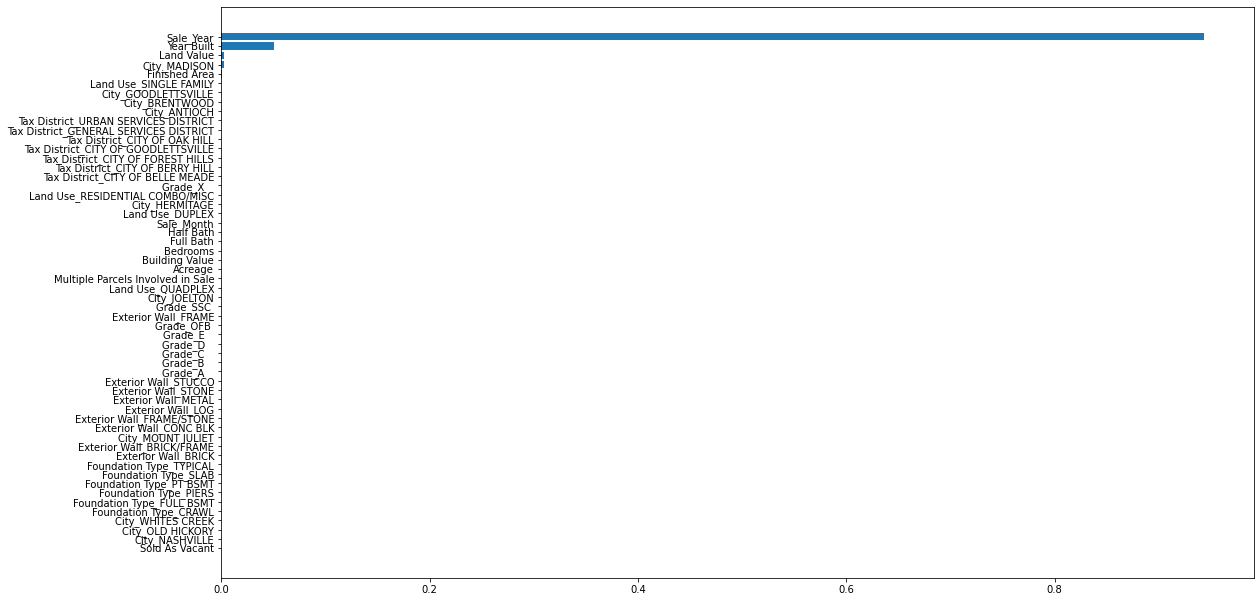

In [36]:
#Feature Importance
importances = clf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# **---------------Random Forest----------------**

In [37]:
############### Random Forest ##############3

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=25,max_depth=4)   
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=25)

In [39]:
#Accuracy

zrf_predict = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,zrf_predict)

0.7287312334412717

In [40]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, zrf_predict))
print(classification_report(y_test, zrf_predict))

[[4446  620]
 [1223  505]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      5066
           1       0.45      0.29      0.35      1728

    accuracy                           0.73      6794
   macro avg       0.62      0.58      0.59      6794
weighted avg       0.70      0.73      0.71      6794



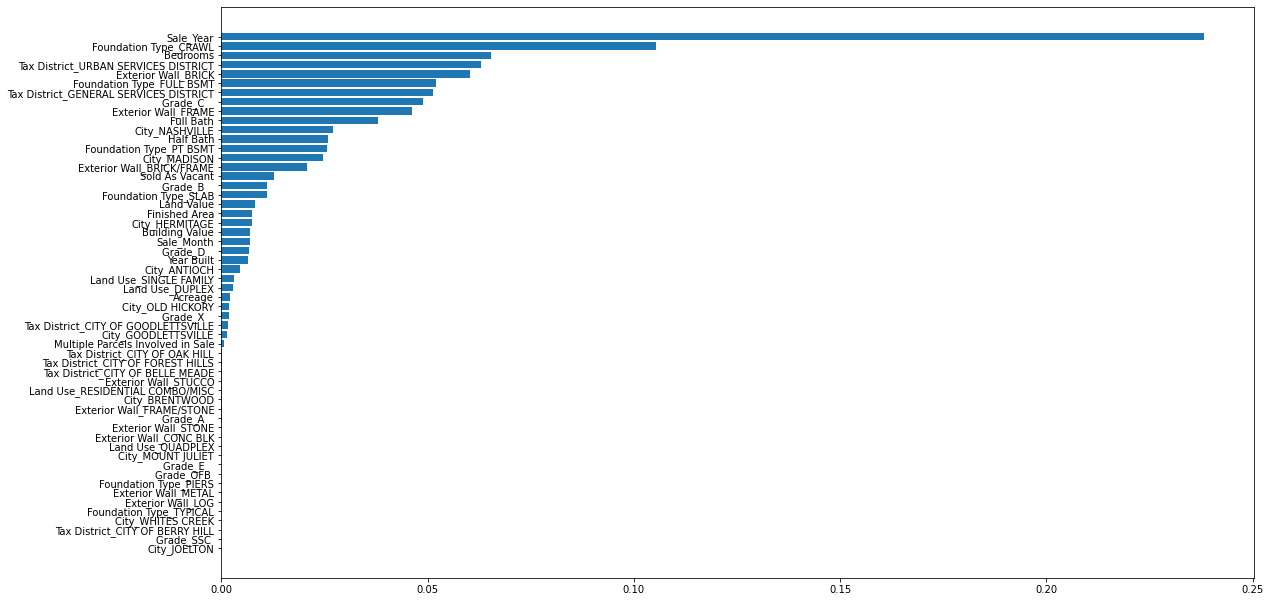

In [41]:
#Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# **---------------Gradient Boost----------------**

In [42]:
########### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=25,max_depth=4)   
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=25)

In [44]:
#Accuracy

zgb_predict = gb_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,zgb_predict)

0.7774506917868708

In [45]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, zgb_predict))
print(classification_report(y_test, zgb_predict))

[[4753  313]
 [1199  529]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      5066
           1       0.63      0.31      0.41      1728

    accuracy                           0.78      6794
   macro avg       0.71      0.62      0.64      6794
weighted avg       0.76      0.78      0.75      6794

